In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
amazon = pd.read_csv(r'C:\Users\mike1\Documents\amazon_cells_labelled.txt', delimiter = "\t")
amazon.columns = ["review", "rating"]

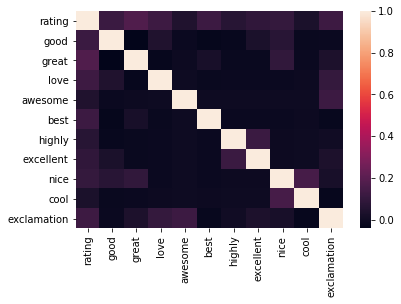

Number of mislabeled points in amazon#1 out of a total 999 points : 374


In [20]:
#Original classifier
keywords = ['good', 'great', 'love', 'awesome', 'best', 'highly', 'excellent', 'nice', 'cool']

for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon['exclamation'] = amazon.review.str.contains('!')

data = amazon[keywords + ['exclamation']]
target = amazon['rating']

sns.heatmap(amazon.corr())
plt.show()

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in amazon#1 out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[451,  48],
       [331, 169]], dtype=int64)

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.65      , 0.68      , 0.66      , 0.59      , 0.61      ,
       0.65      , 0.59      , 0.61      , 0.59      , 0.55555556])

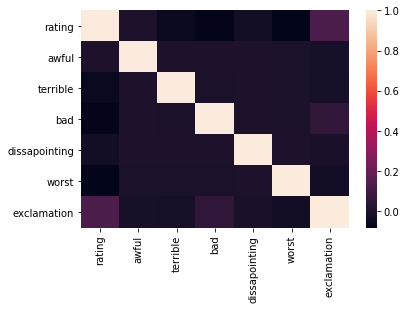

Number of mislabeled points in amazon#2 out of a total 999 points : 457
[[464  35]
 [422  78]]
[0.57       0.57       0.55       0.52       0.53       0.6
 0.53       0.52       0.5        0.52525253]


In [39]:
#2 classifier -- negative wording
amazon2 = pd.read_csv(r'C:\Users\mike1\Documents\amazon_cells_labelled.txt', delimiter = "\t")
amazon2.columns = ['review', 'rating']

keywords = ['awful', 'terrible', 'bad', 'dissapointing', 'worst' ]

for key in keywords:
    amazon2[str(key)] = amazon2.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon2['exclamation'] = amazon2.review.str.contains('!')

sns.heatmap(amazon2.corr())
plt.show()

data = amazon2[keywords + ['exclamation']]
target = amazon2['rating']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in amazon#2 out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print(confusion_matrix(target, y_pred))

print(cross_val_score(bnb, data, target, cv=10))

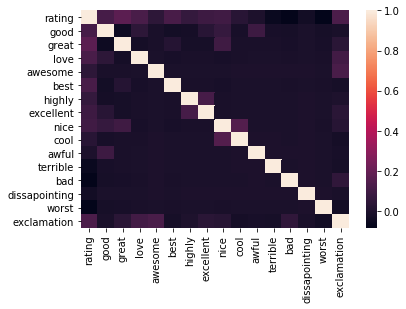

Number of mislabeled points in amazon#3 out of a total 999 points : 372
[[451  48]
 [324 176]]
[0.65       0.69       0.67       0.59       0.63       0.64
 0.59       0.64       0.6        0.56565657]


In [36]:
#3 classifier -- negative wording & positive
amazon3 = pd.read_csv(r'C:\Users\mike1\Documents\amazon_cells_labelled.txt', delimiter = "\t")
amazon3.columns = ['review', 'rating']

keywords = ['good', 'great', 'love', 'awesome', 'best', 'highly', 'excellent', 'nice', 'cool', 'awful', 'terrible', 'bad', 'dissapointing', 'worst' ]

for key in keywords:
    amazon3[str(key)] = amazon3.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon3['exclamation'] = amazon3.review.str.contains('!')

sns.heatmap(amazon3.corr())
plt.show()

data = amazon3[keywords + ['exclamation']]
target = amazon3['rating']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in amazon#3 out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print(confusion_matrix(target, y_pred))

print(cross_val_score(bnb, data, target, cv=10))

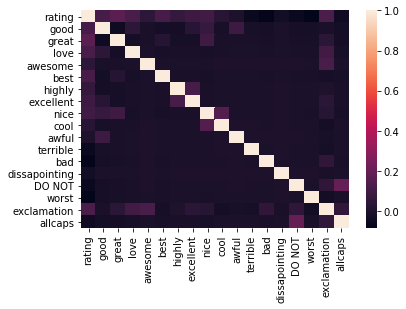

Number of mislabeled points in amazon#4 out of a total 999 points : 371
[[454  45]
 [326 174]]
[0.66       0.68       0.67       0.59       0.63       0.64
 0.59       0.64       0.61       0.55555556]


In [37]:
#4 classifier -- negative wording & positive + allcaps
amazon4 = pd.read_csv(r'C:\Users\mike1\Documents\amazon_cells_labelled.txt', delimiter = "\t")
amazon4.columns = ['review', 'rating']

keywords = ['good', 'great', 'love', 'awesome', 'best', 'highly', 'excellent', 'nice', 'cool', 'awful', 'terrible', 'bad', 'dissapointing', 'DO NOT', 'worst' ]

for key in keywords:
    amazon4[str(key)] = amazon4.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon4['exclamation'] = amazon4.review.str.contains('!')
amazon4['allcaps'] = amazon4.review.str.isupper()

sns.heatmap(amazon4.corr())
plt.show()

data = amazon4[keywords + ['exclamation'] + ['allcaps']]
target = amazon4['rating']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in amazon#4 out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print(confusion_matrix(target, y_pred))

print(cross_val_score(bnb, data, target, cv=10))

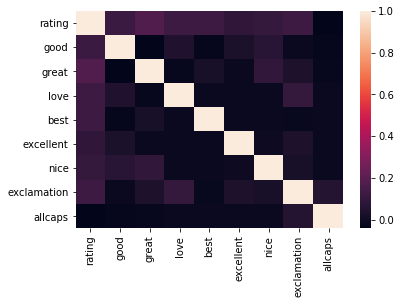

Number of mislabeled points in amazon#5 out of a total 999 points : 379
[[453  46]
 [333 167]]
[0.65       0.68       0.66       0.59       0.61       0.65
 0.59       0.61       0.59       0.55555556]


In [38]:
#5 classifier -- try most correlated variables
amazon5 = pd.read_csv(r'C:\Users\mike1\Documents\amazon_cells_labelled.txt', delimiter = "\t")
amazon5.columns = ['review', 'rating']

keywords = ['good', 'great', 'love', 'best', 'excellent', 'nice']
for key in keywords:
    amazon5[str(key)] = amazon5.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon5['exclamation'] = amazon5.review.str.contains('!')
amazon5['allcaps'] = amazon5.review.str.isupper()

sns.heatmap(amazon5.corr())
plt.show()

data = amazon5[keywords + ['exclamation'] + ['allcaps']]
target = amazon5['rating']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points in amazon#5 out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print(confusion_matrix(target, y_pred))

print(cross_val_score(bnb, data, target, cv=10))

Do any of your classifiers seem to overfit?

Most of the classifiers seem to be overfitting. The model that performed the worst (#2) had the least fluctuation. There definitely seems to be a greater amount of fluctuation as the number of variables increases.

Which seem to perform the best? 

All the models seem to perform similarly except for the classifier just using negative words. This was a little surprising to me because I thought this would have been a better performer.

Which features seemed to be most impactful to performance?

The keywords appear to be the most impactful as adding in exclamations and allcaps didn't seem to change the accuracy much from the first classifier. I couldn't think of any other features we could implement besides just keywords and looking at puntuation and capitalization so maybe there would be something else that would increase the accuracy that I didn't employ. 
